## 如沒有 graphviz套件，可用conda或pip安裝



In [62]:
!pip install --upgrade pip --user
!pip install graphviz
import pandas as pd
import graphviz
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics

Requirement already up-to-date: pip in c:\users\bocheng\appdata\roaming\python\python37\site-packages (19.0.3)


In [75]:
#讀取CSV檔案
data = pd.read_csv('glass.csv')

## 切分input 和output

In [76]:
#x:input
x=data.loc[:,['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
#y:output
y=data.loc[:,['Type']]

## 轉換屬性及標籤型別

In [88]:
#轉換屬性型態
#將屬性轉為數字label
le = preprocessing.LabelEncoder()

#將type 轉為數字label
#type: build wind float: 0 ,build wind non-float: 1 ,vehic wind float: 2 
#      containers: 3 ,headlamps: 4 ,tablewares: 5
Y_type_label=le.fit_transform(y['Type'])

#將屬性合併
#變成list
feature=list(zip(x.RI,x.Na,x.Mg,x.Al,x.Si,x.K,x.Ca,x.Ba,x.Fe))

#轉成array
import numpy as np
features=np.asarray(feature)

## 切分訓練集與資料集

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Y_type_label, test_size=0.34)

## sklearn: DecisionTreeClassifier

In [173]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=3,max_leaf_nodes = 4)
glass_clf = clf.fit(X_train,y_train)

## 測試模型

In [174]:
test_predicted = glass_clf.predict(X_test)
train_predicted = glass_clf.predict(X_train)

# 驗證準確度
test_accuracy = metrics.accuracy_score(test_predicted, y_test)
train_accuracy = metrics.accuracy_score(train_predicted, y_train)
print("測試集精準度: ",test_accuracy)
print("訓練集精準度: ",train_accuracy)

測試集精準度:  0.589041095890411
訓練集精準度:  0.6950354609929078


## 產生決策樹圖形

In [166]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("glass") 

'glass.pdf'

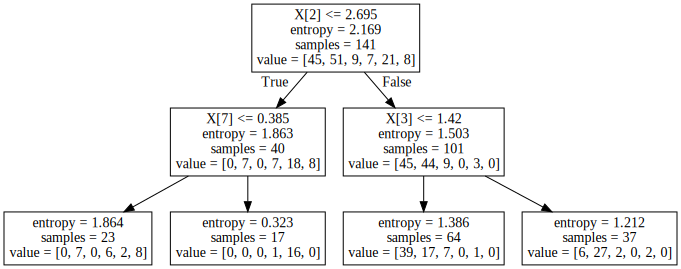

In [167]:
graph